In [1]:
# Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from model_helpers import eval_perform_multi_class
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
CLASS_NAMES = ["Negras", "Blancas"]

In [2]:
data_path = "../CHESS/data/df_3_cod.csv"
df_3 = pd.read_csv(data_path)
df_3.columns

Index(['game_id', 'rated', 'turns', 'winner', 'time_increment', 'white_rating',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_variation',
       'moves_fen', 'current_turn', 'w_ctrld_pawn', 'w_ctrld_knight',
       'w_ctrld_bishop', 'w_ctrld_rook', 'w_ctrld_queen', 'w_ctrld_king',
       'w_preassure_points', 'w_ctrld_diagonals', 'w_ctrld_lines',
       'b_ctrld_pawn', 'b_ctrld_knight', 'b_ctrld_bishop', 'b_ctrld_rook',
       'b_ctrld_queen', 'b_ctrld_king', 'b_preassure_points',
       'b_ctrld_diagonals', 'b_ctrld_lines', 'rated_cod', 'winner_cod',
       'current_turn_cod', 'time_increment_cod', 'opening_code_cod',
       'opening_fullname_cod', 'opening_shortname_cod',
       'opening_variation_cod', 'moves_fen_cod'],
      dtype='object')

#  DF conservando solo características de la posición tanto de blancas como de negras generadas a partir de las cadenas FEN de partidas históricas

In [3]:
X = df_3.copy()
y_name = "winner_cod"
# X es el dataframe eliminando la variable de salida
X = X.drop(columns=['rated','winner',y_name, 'current_turn','time_increment','opening_code','opening_fullname','opening_shortname','opening_variation','moves_fen'])
X = X.drop(columns=['game_id', 'white_rating', 'black_rating', 'moves', 'current_turn_cod', 'opening_moves', 'rated_cod', 'current_turn_cod', 'time_increment_cod', 'opening_code_cod', 'opening_fullname_cod', 'opening_shortname_cod', 'opening_variation_cod', 'moves_fen_cod'])
# Y es un array unidimensional (ravel) de la variable de salida
Y = df_3[y_name].ravel()
X.columns

Index(['turns', 'w_ctrld_pawn', 'w_ctrld_knight', 'w_ctrld_bishop',
       'w_ctrld_rook', 'w_ctrld_queen', 'w_ctrld_king', 'w_preassure_points',
       'w_ctrld_diagonals', 'w_ctrld_lines', 'b_ctrld_pawn', 'b_ctrld_knight',
       'b_ctrld_bishop', 'b_ctrld_rook', 'b_ctrld_queen', 'b_ctrld_king',
       'b_preassure_points', 'b_ctrld_diagonals', 'b_ctrld_lines'],
      dtype='object')

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)
X_train.columns

Index(['turns', 'w_ctrld_pawn', 'w_ctrld_knight', 'w_ctrld_bishop',
       'w_ctrld_rook', 'w_ctrld_queen', 'w_ctrld_king', 'w_preassure_points',
       'w_ctrld_diagonals', 'w_ctrld_lines', 'b_ctrld_pawn', 'b_ctrld_knight',
       'b_ctrld_bishop', 'b_ctrld_rook', 'b_ctrld_queen', 'b_ctrld_king',
       'b_preassure_points', 'b_ctrld_diagonals', 'b_ctrld_lines'],
      dtype='object')

# Maquina de soporte vectorial

In [5]:
# Crear un clasificador SVM para clasificación con kernel lineal, polinomial y de funcion de base radial
mod_linear = svm.SVC(kernel='linear',C=1, probability=True)
mod_poly = svm.SVC(kernel='poly',degree=2,C=1, probability=True)
mod_rbf = svm.SVC(kernel='rbf',C=1,gamma='auto', probability=True)

In [6]:
# Entrenar el clasificador con los datos de entrenamiento
mod_linear.fit(X_train, Y_train)

SVC(C=1, kernel='linear', probability=True)


Performance del modelo de Prueba SVM kernel lineal características blancas y negras


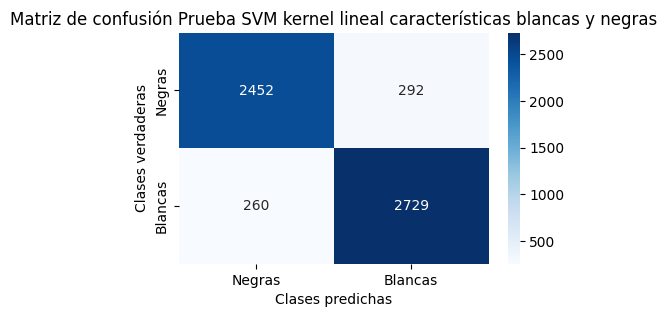

 Accu 0.9037153322867608 
 Prec 0.9037197224751601 
 Reca 0.9037153322867608

Métricas de Probabilidad:
 Brier Score: 0.07228879730136617


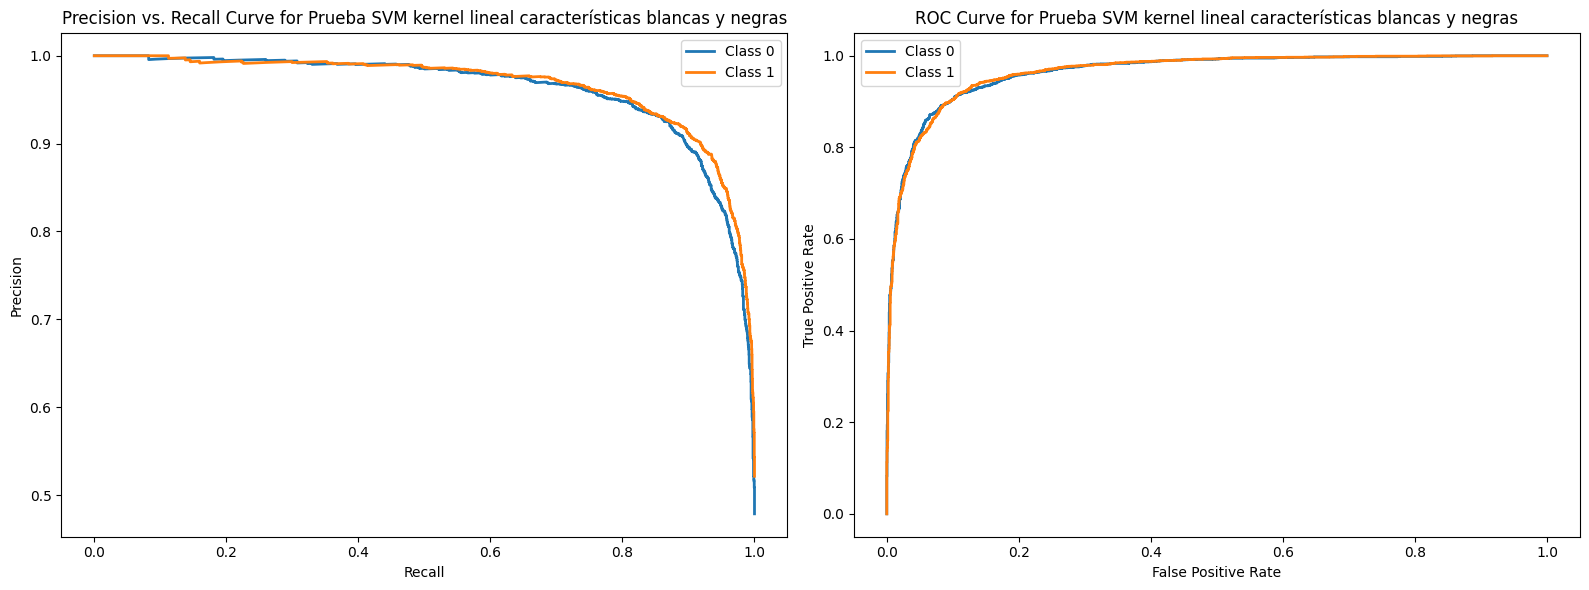


Performance del modelo de Entrenamiento SVM kernel lineal características blancas y negras


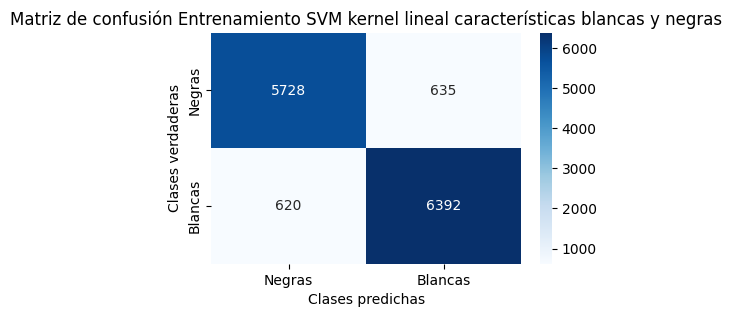

 Accu 0.9061682242990654 
 Prec 0.9061600342151216 
 Reca 0.9061682242990654

Métricas de Probabilidad:
 Brier Score: 0.06961798440039915


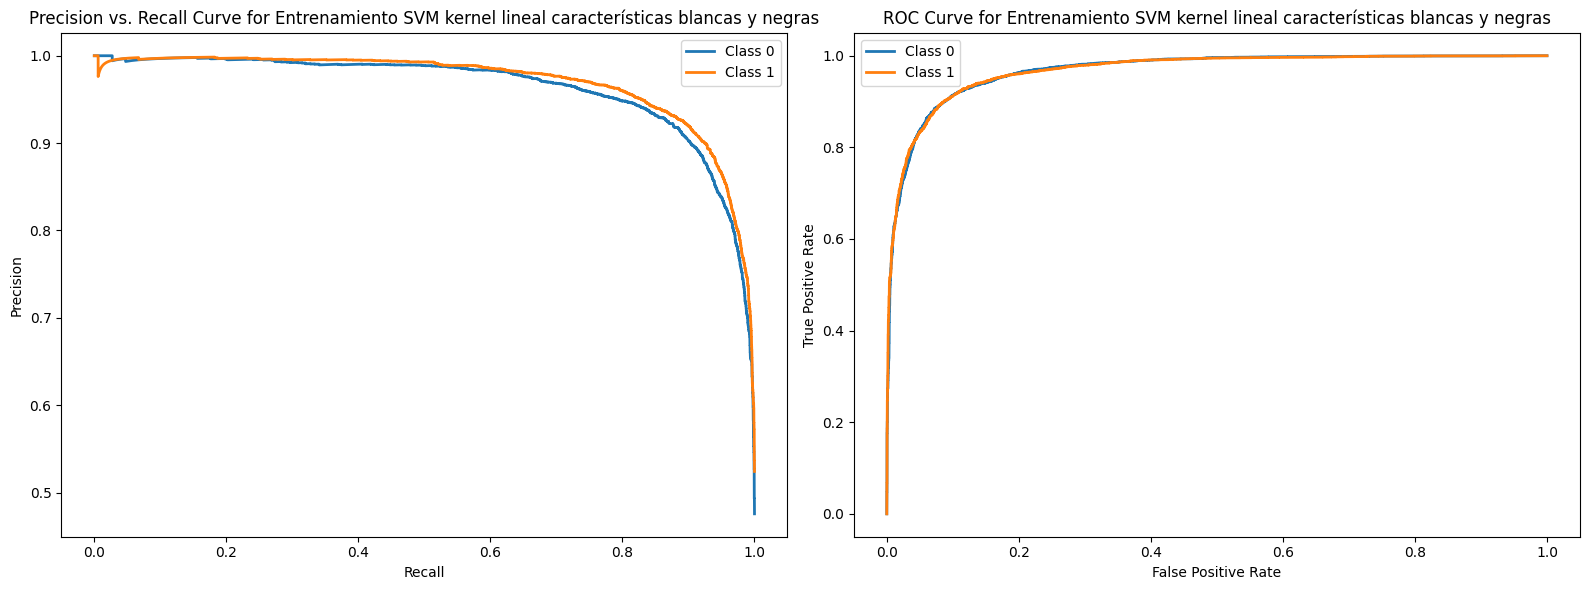

(0.9061682242990654,
 0.9061600342151216,
 0.9061682242990654,
 0.06961798440039915,
 array([[5728,  635],
        [ 620, 6392]], dtype=int64))

In [7]:
# Salida Y & "hat" (ŷ) que denota predicciones estimadas.
Yhat_linear_test = mod_linear.predict(X_test)
Yhat_linear_train = mod_linear.predict(X_train)
Yhat_linear_test_prob = mod_linear.predict_proba(X_test)
Yhat_linear_train_prob = mod_linear.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_linear_test,Yhat_linear_test_prob,CLASS_NAMES,"Prueba SVM kernel lineal características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_linear_train,Yhat_linear_train_prob,CLASS_NAMES, "Entrenamiento SVM kernel lineal características blancas y negras")

In [8]:
mod_poly.fit(X_train, Y_train)

SVC(C=1, degree=2, kernel='poly', probability=True)


Performance del modelo de Prueba SVM kernel polinomial características blancas y negras


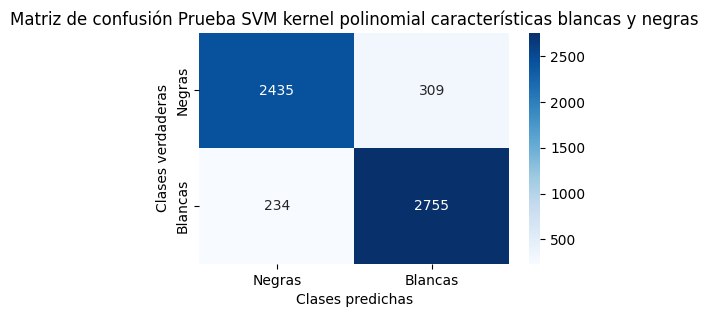

 Accu 0.9052851909994767 
 Prec 0.9054575520420436 
 Reca 0.9052851909994767

Métricas de Probabilidad:
 Brier Score: 0.07117307248319432


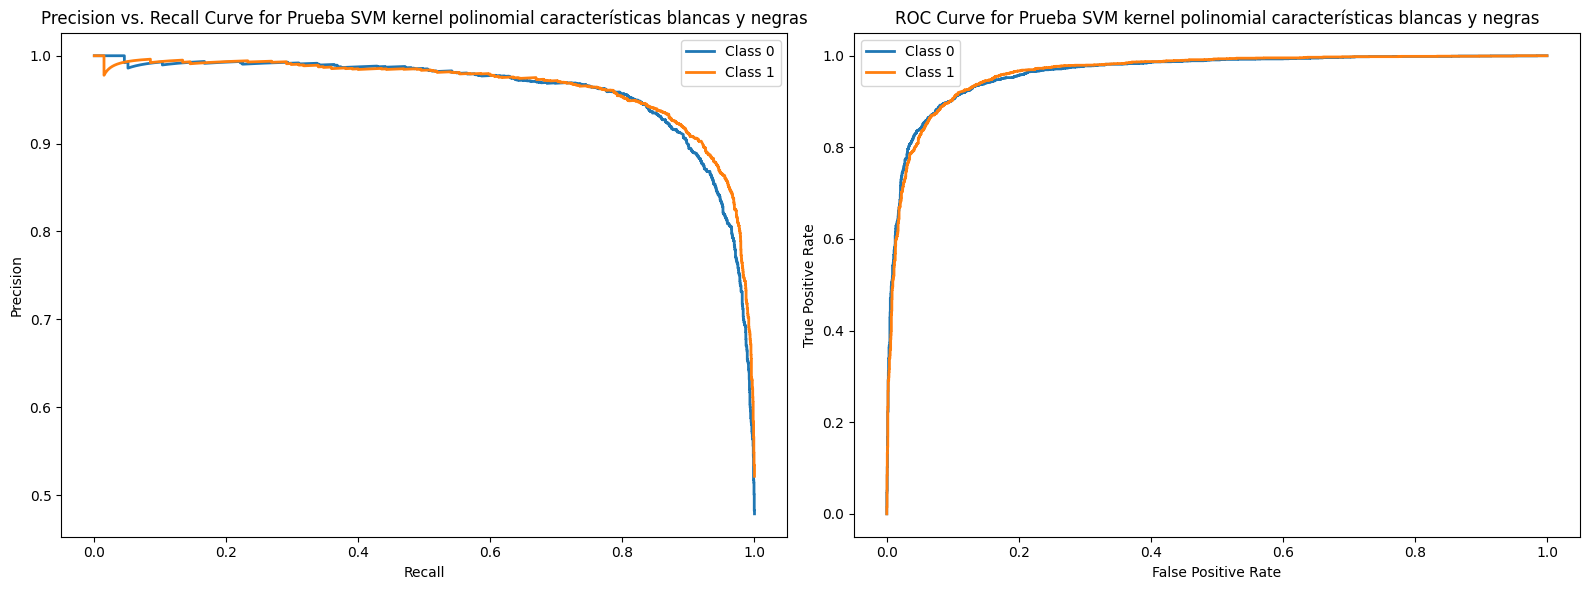


Performance del modelo de Entrenamiento SVM kernel polinomial características blancas y negras


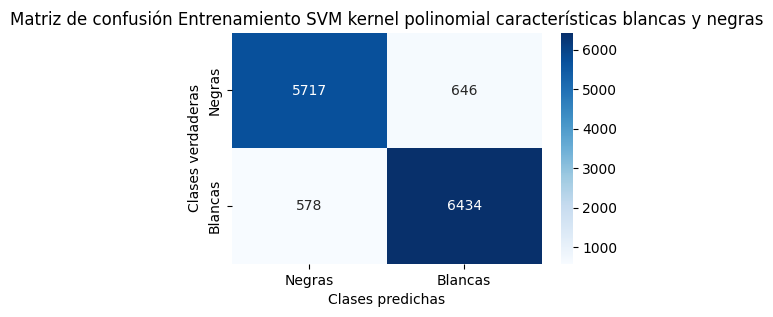

 Accu 0.9084859813084112 
 Prec 0.9084830530324752 
 Reca 0.9084859813084112

Métricas de Probabilidad:
 Brier Score: 0.06888437306612599


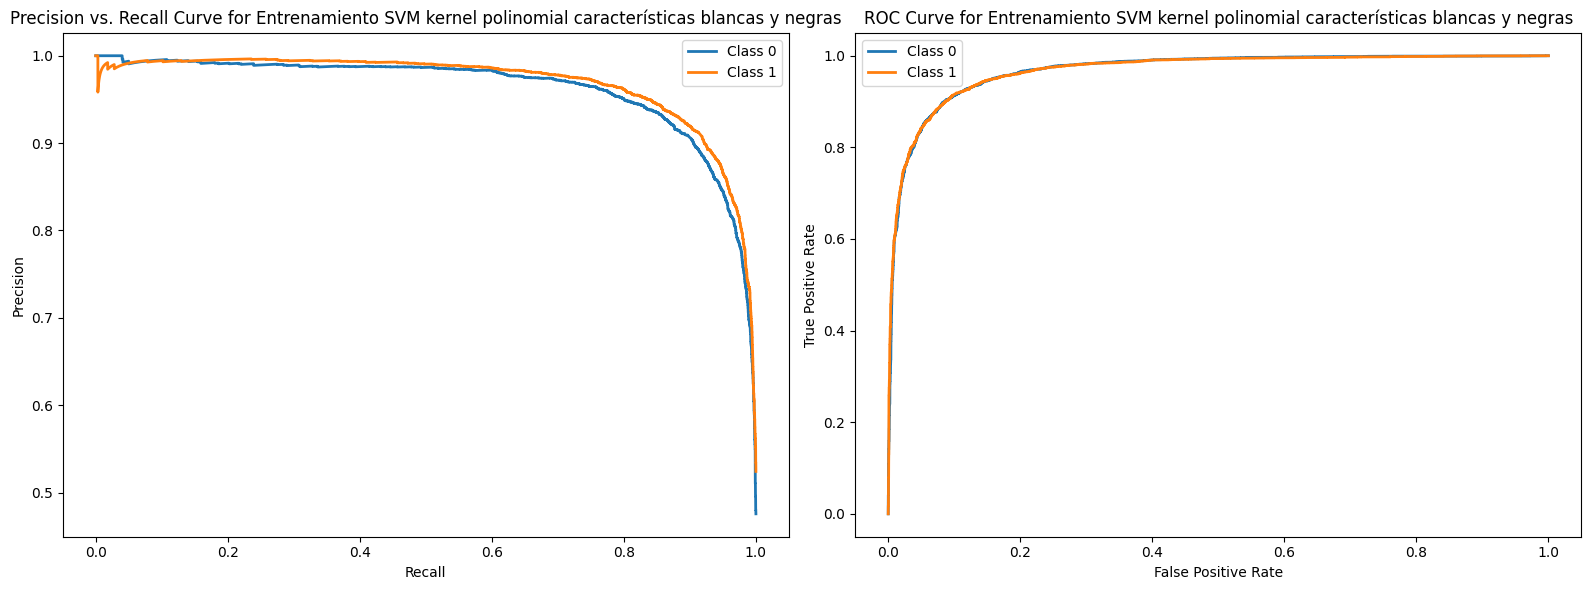

(0.9084859813084112,
 0.9084830530324752,
 0.9084859813084112,
 0.06888437306612599,
 array([[5717,  646],
        [ 578, 6434]], dtype=int64))

In [9]:
Yhat_poly_test = mod_poly.predict(X_test)
Yhat_poly_train = mod_poly.predict(X_train)
Yhat_poly_test_prob = mod_poly.predict_proba(X_test)
Yhat_poly_train_prob = mod_poly.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_poly_test, Yhat_poly_test_prob,CLASS_NAMES, "Prueba SVM kernel polinomial características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_poly_train, Yhat_poly_train_prob,CLASS_NAMES, "Entrenamiento SVM kernel polinomial características blancas y negras")

In [10]:
mod_rbf.fit(X_train, Y_train)

SVC(C=1, gamma='auto', probability=True)


Performance del modelo de Prueba SVM kernel rbf características blancas y negras


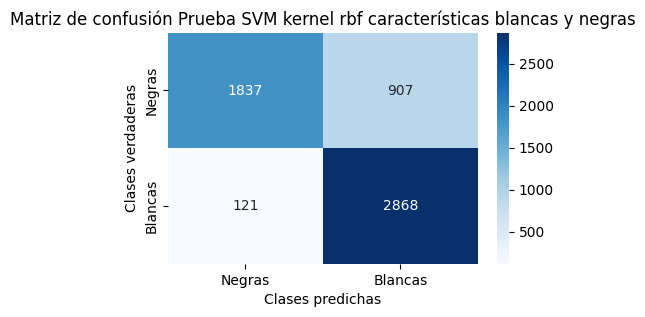

 Accu 0.8206872492586779 
 Prec 0.8451552726692245 
 Reca 0.8206872492586779

Métricas de Probabilidad:
 Brier Score: 0.10855005810695124


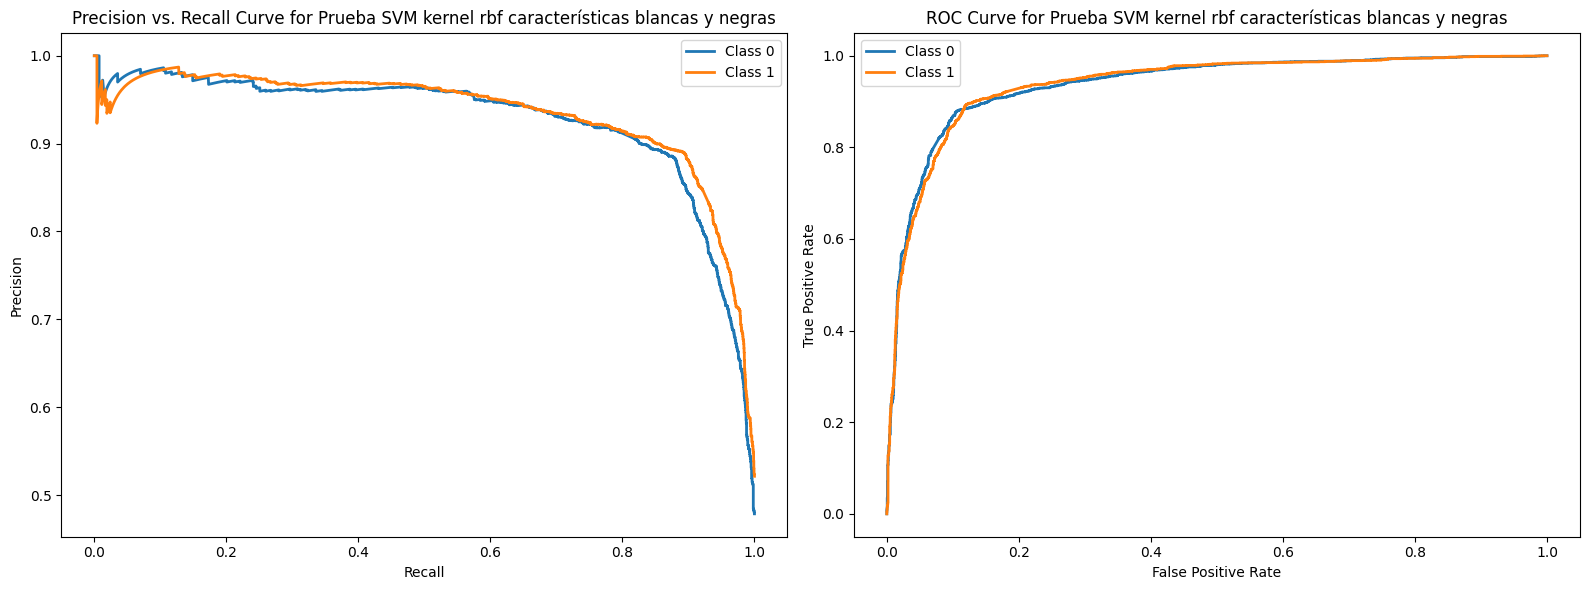


Performance del modelo de Entrenamiento SVM kernel rbf características blancas y negras


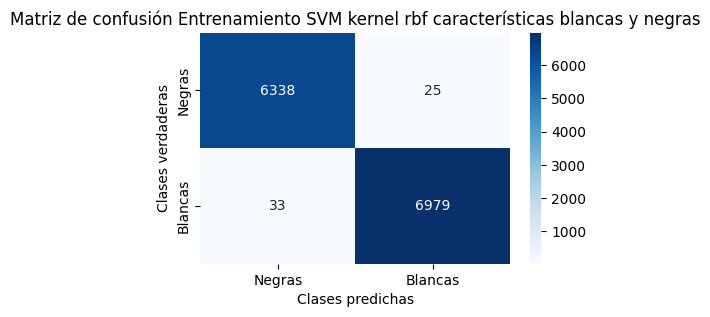

 Accu 0.9956635514018691 
 Prec 0.9956645145909164 
 Reca 0.9956635514018691

Métricas de Probabilidad:
 Brier Score: 0.003940886492212954


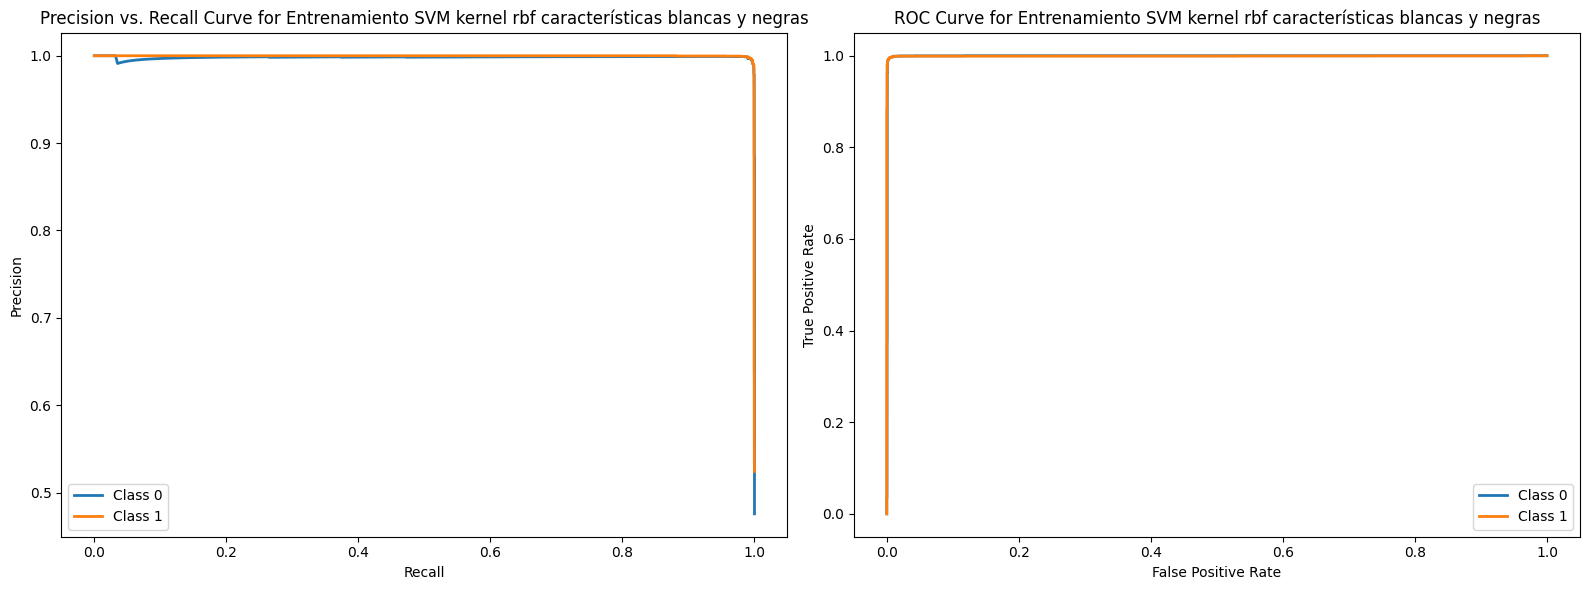

(0.9956635514018691,
 0.9956645145909164,
 0.9956635514018691,
 0.003940886492212954,
 array([[6338,   25],
        [  33, 6979]], dtype=int64))

In [11]:
Yhat_rbf_test = mod_rbf.predict(X_test)
Yhat_rbf_train = mod_rbf.predict(X_train)
Yhat_rbf_test_prob = mod_rbf.predict_proba(X_test)
Yhat_rbf_train_prob = mod_rbf.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_rbf_test, Yhat_rbf_test_prob,CLASS_NAMES,"Prueba SVM kernel rbf características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_rbf_train, Yhat_rbf_train_prob,CLASS_NAMES,"Entrenamiento SVM kernel rbf características blancas y negras")

# XGboost 

In [12]:
import xgboost as xgb
# Crear un clasificador XGBoost
xgboost = xgb.XGBClassifier()

In [13]:
# Entrenar el modelo en los datos de entrenamiento
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Performance del modelo de Prueba Xgboost características blancas y negras


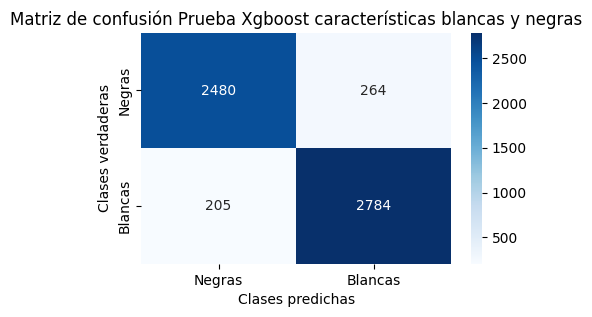

 Accu 0.9181929181929182 
 Prec 0.9182985488796424 
 Reca 0.9181929181929182

Métricas de Probabilidad:
 Brier Score: 0.060905041350982014


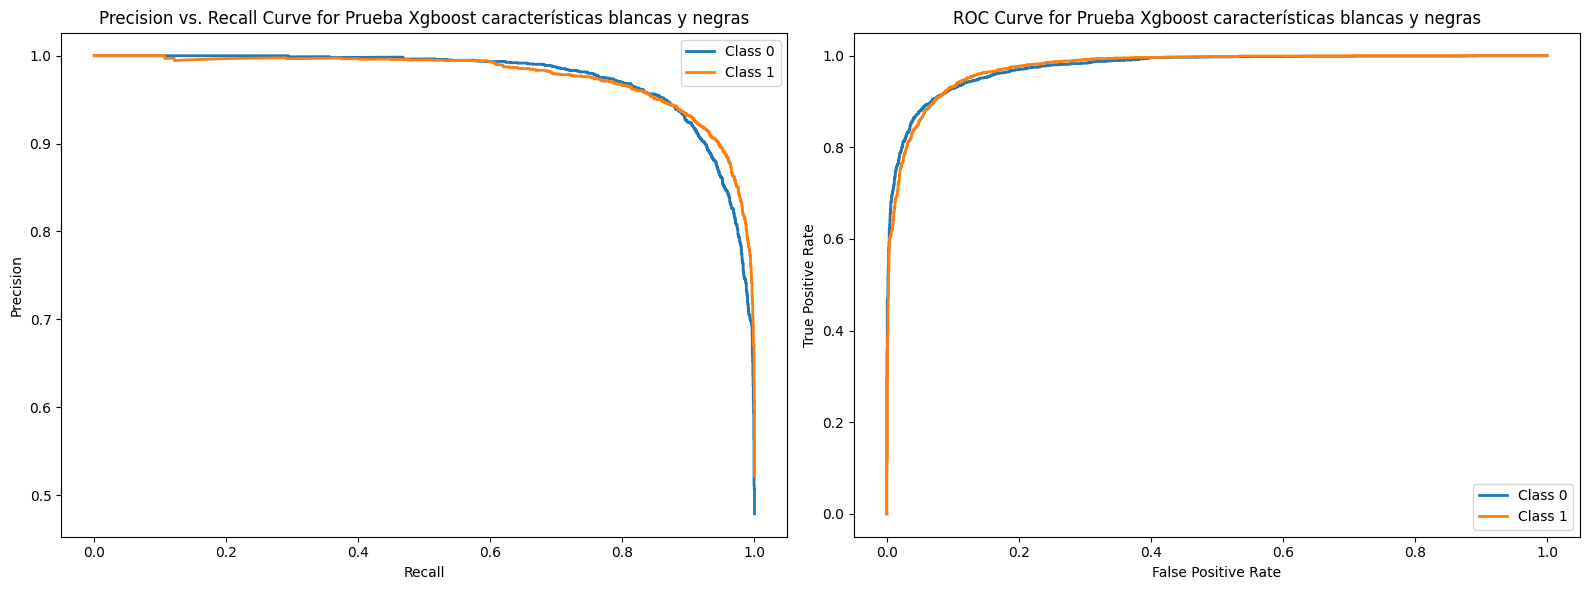


Performance del modelo de Entrenamiento Xgboost características blancas y negras


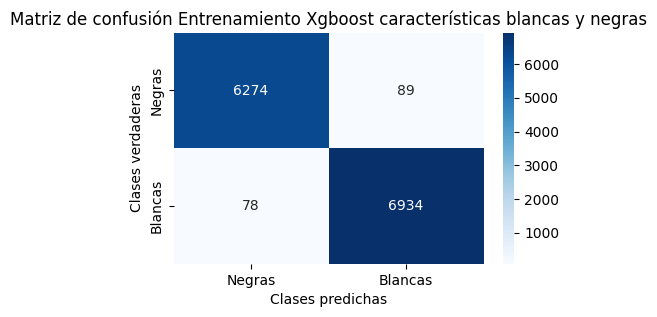

 Accu 0.9875140186915888 
 Prec 0.987514341947696 
 Reca 0.9875140186915888

Métricas de Probabilidad:
 Brier Score: 0.01419191988498985


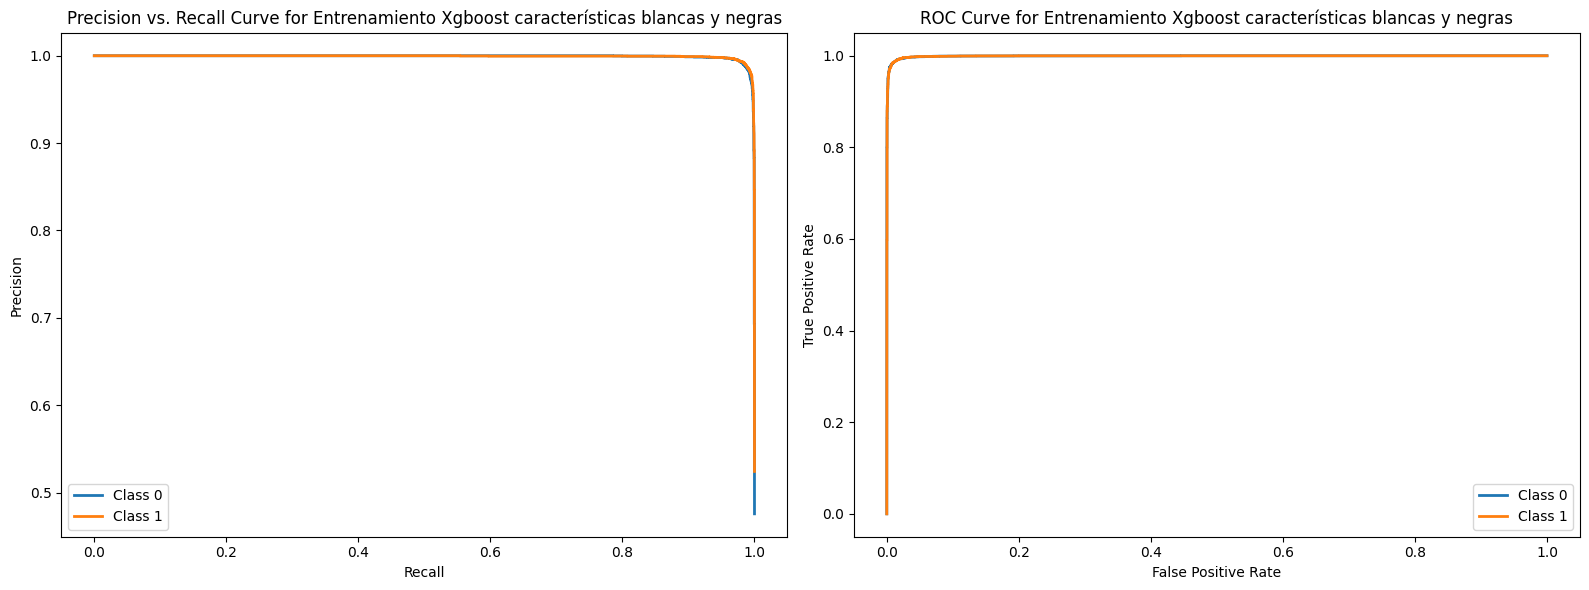

(0.9875140186915888,
 0.987514341947696,
 0.9875140186915888,
 0.01419191988498985,
 array([[6274,   89],
        [  78, 6934]], dtype=int64))

In [14]:
Yhat_xgboost_test = xgboost.predict(X_test)
Yhat_xgboost_train = xgboost.predict(X_train)
Yhat_xgboost_test_prob = xgboost.predict_proba(X_test)
Yhat_xgboost_train_prob = xgboost.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_xgboost_test, Yhat_xgboost_test_prob,CLASS_NAMES,"Prueba Xgboost características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_xgboost_train, Yhat_xgboost_train_prob,CLASS_NAMES,"Entrenamiento Xgboost características blancas y negras")

# LightGBM 

In [15]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 7012, number of negative: 6363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 13375, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524262 -> initscore=0.097123
[LightGBM] [Info] Start training from score 0.097123


LGBMClassifier()


Performance del modelo de Prueba LightGBM características blancas y negras

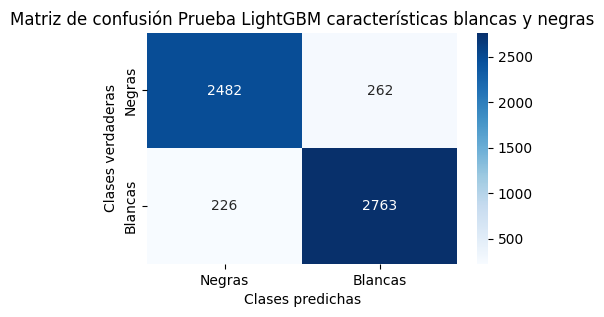

 Accu 0.9148787720216291 
 Prec 0.9148985845481079 
 Reca 0.9148787720216291

Métricas de Probabilidad:
 Brier Score: 0.06138326609186123


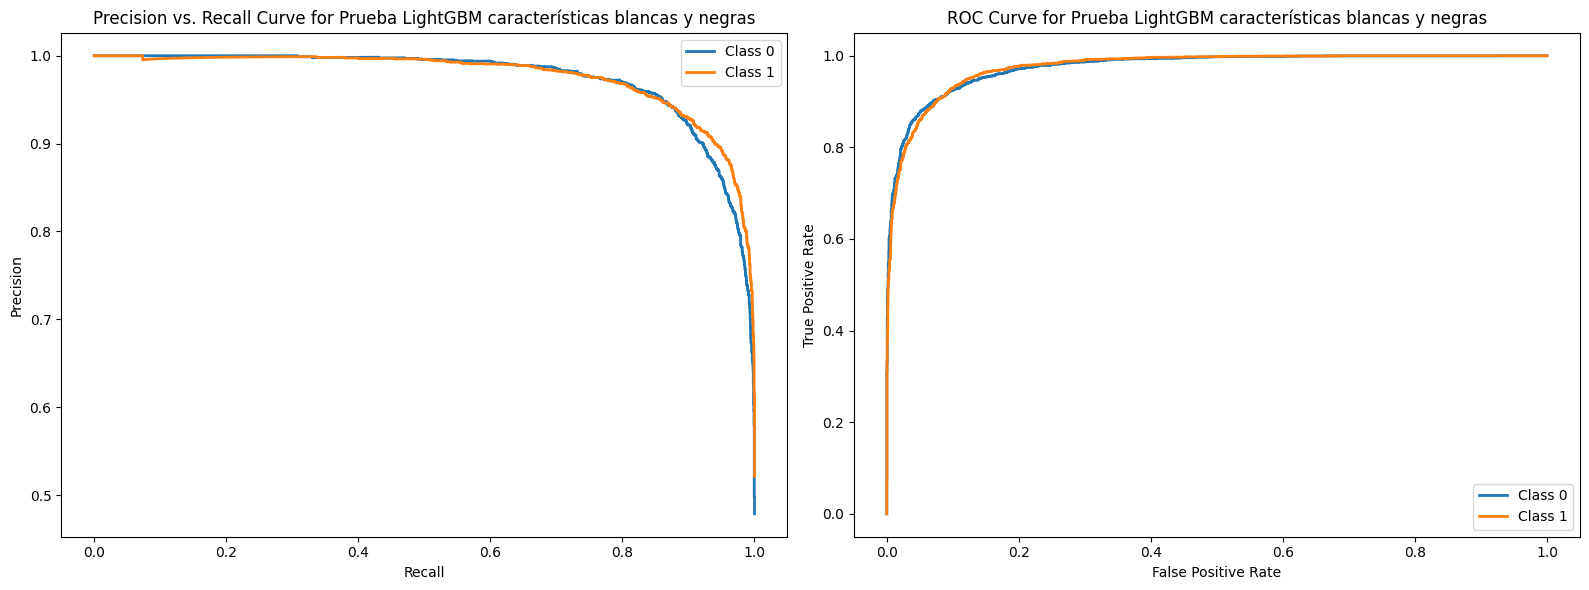


Performance del modelo de Entrenamiento LightGBM características blancas y negras


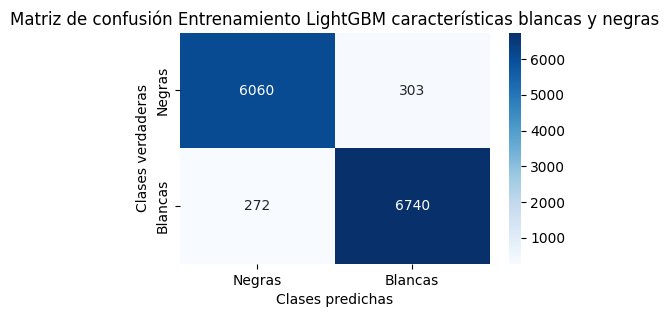

 Accu 0.9570093457943926 
 Prec 0.9570094965131505 
 Reca 0.9570093457943926

Métricas de Probabilidad:
 Brier Score: 0.034980441577854335


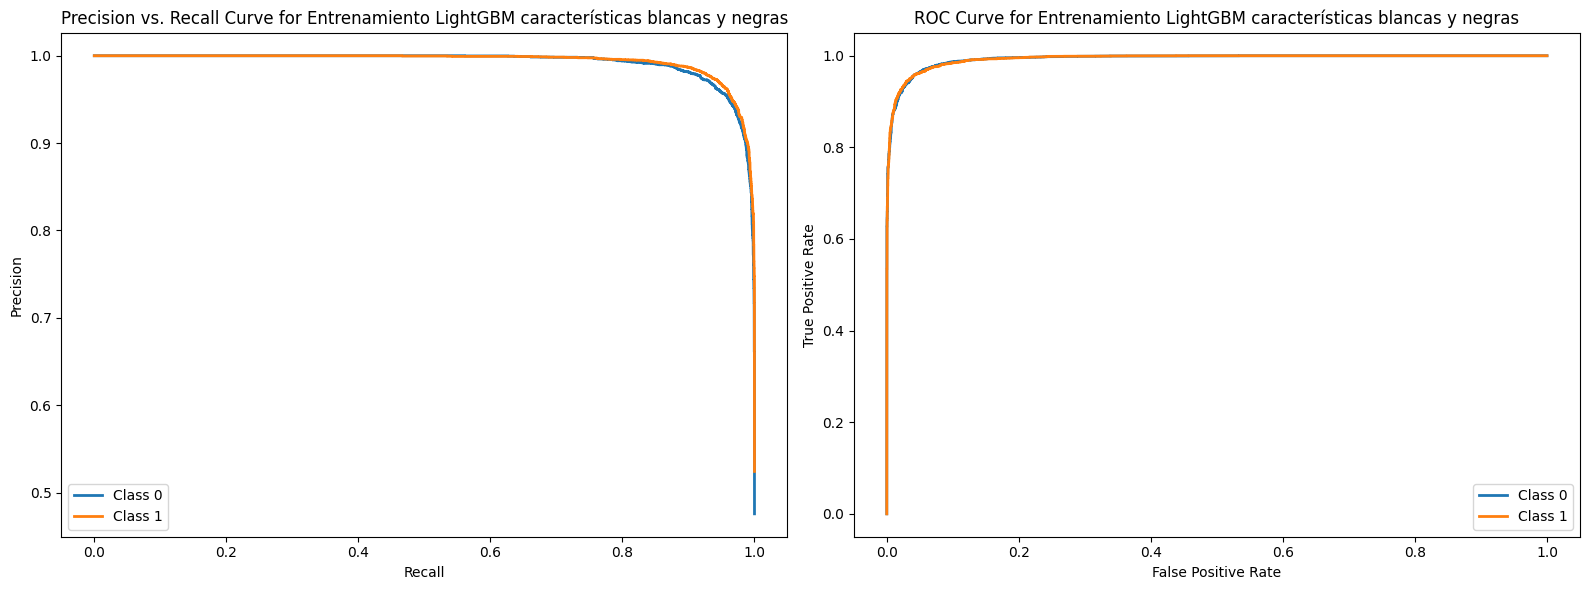

(0.9570093457943926,
 0.9570094965131505,
 0.9570093457943926,
 0.034980441577854335,
 array([[6060,  303],
        [ 272, 6740]], dtype=int64))

In [16]:
Yhat_lgbm_test = lgbm.predict(X_test)
Yhat_lgbm_train = lgbm.predict(X_train)
Yhat_lgbm_test_prob = lgbm.predict_proba(X_test)
Yhat_lgbm_train_prob = lgbm.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_lgbm_test,Yhat_lgbm_test_prob, CLASS_NAMES, "Prueba LightGBM características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_lgbm_train,Yhat_lgbm_train_prob, CLASS_NAMES,"Entrenamiento LightGBM características blancas y negras")